# Telecom X - Análisis de Evasión de Clientes

# Importación de Datos

In [280]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from scipy.stats import kurtosis
import warnings
warnings.filterwarnings('ignore')
import os

print("Librerías importadas correctamente. Entorno en Google Colab listo para trabajar.")

Librerías importadas correctamente. Entorno en Google Colab listo para trabajar.


In [281]:
#Importanción de datos
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

#Importación de Diccionario
url_diccionario = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/diccionario.csv'

response = requests.get(url)
data = response.json()

#Convertir datos en Dataframe
df = pd.DataFrame(data)
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [282]:
#Revisión de datos
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [283]:
#Columnas del Dataset
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [284]:
# Columnas no normalizadas
normal = df.columns[2:]

# Normalización y unión con el dataframe
for i in range(len(normal)):
    norm = pd.json_normalize(df[normal[i]])
    print(norm.shape)
    df.drop(normal[i], axis=1, inplace=True)
    df = df.join(norm)

# Revisión
df.head()

(7267, 5)
(7267, 2)
(7267, 7)
(7267, 5)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [285]:
#Verificcando el conjunto de los datos
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [286]:
# Tipos de datos del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

### Comprobación de inconsistencia de datos

In [287]:
# Revisión de datos duplicados
df.duplicated().sum()

np.int64(0)

In [288]:
# Revisión de datos nulos y de los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [289]:
# Estadísticas de datos categóricos
df.describe(include=["O"])

,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Total
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,11


###Revisión de las Columnas más importantes

In [290]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [291]:
df["InternetService"].value_counts()

,count
InternetService,
Fiber optic,3198
DSL,2488
No,1581


In [292]:
df["TechSupport"].value_counts()

,count
TechSupport,
No,3582
Yes,2104
No internet service,1581


In [293]:
df["StreamingTV"].value_counts()

,count
StreamingTV,
No,2896
Yes,2790
No internet service,1581


In [294]:
df["StreamingMovies"].value_counts()

,count
StreamingMovies,
No,2870
Yes,2816
No internet service,1581


In [295]:
df["Contract"].value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [296]:
df["Charges.Total"].head()

,Charges.Total
0,593.3
1,542.4
2,280.85
3,1237.85
4,267.4


In [297]:
df[["tenure", "Charges.Monthly", "Charges.Total"]].describe()

,tenure,Charges.Monthly
count,7267.000000,7267.000000
mean,32.346498,64.720098
std,24.571773,30.129572
min,0.000000,18.250000
25%,9.000000,35.425000
50%,29.000000,70.300000
75%,55.000000,89.875000
max,72.000000,118.750000


#📌 Extracción

### Transformación de inconsistencias

In [298]:
# Reemplazo de datos inconsistentes con la moda
print(df["Churn"].mode())
df["Churn"] = df["Churn"].apply(lambda x: "No" if (x != "Yes") & (x != "No") else x)
df["Churn"].value_counts()

0    No
Name: Churn, dtype: object


,count
Churn,
No,5398
Yes,1869


In [299]:
# Convertir columna categórica a numérica
df["Charges.Total"] = df["Charges.Total"].str.strip().replace("", "0")
df["Charges.Total"] = df["Charges.Total"].astype(np.float64)
df["Charges.Total"].head()

,Charges.Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40


In [300]:
df[["tenure", "Charges.Monthly", "Charges.Total"]].describe()

,tenure,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035
std,24.571773,30.129572,2268.648587
min,0.000000,18.250000,0.000000
25%,9.000000,35.425000,396.200000
50%,29.000000,70.300000,1389.200000
75%,55.000000,89.875000,3778.525000
max,72.000000,118.750000,8684.800000


In [301]:
#Distribución de probabilidad de las algunas columnas
num_col = ["tenure", "Charges.Monthly", "Charges.Total"]

print("Kurtosis de columnas numéricas importantes el dataset (para identificar atípicos)")

for i in num_col:
    print(f"Columna {i}: {df[i].kurtosis()}")

Kurtosis de columnas numéricas importantes el dataset (para identificar atípicos)
Columna tenure: -1.3889808474365166
Columna Charges.Monthly: -1.2615115235678378
Columna Charges.Total: -0.22733025208576452


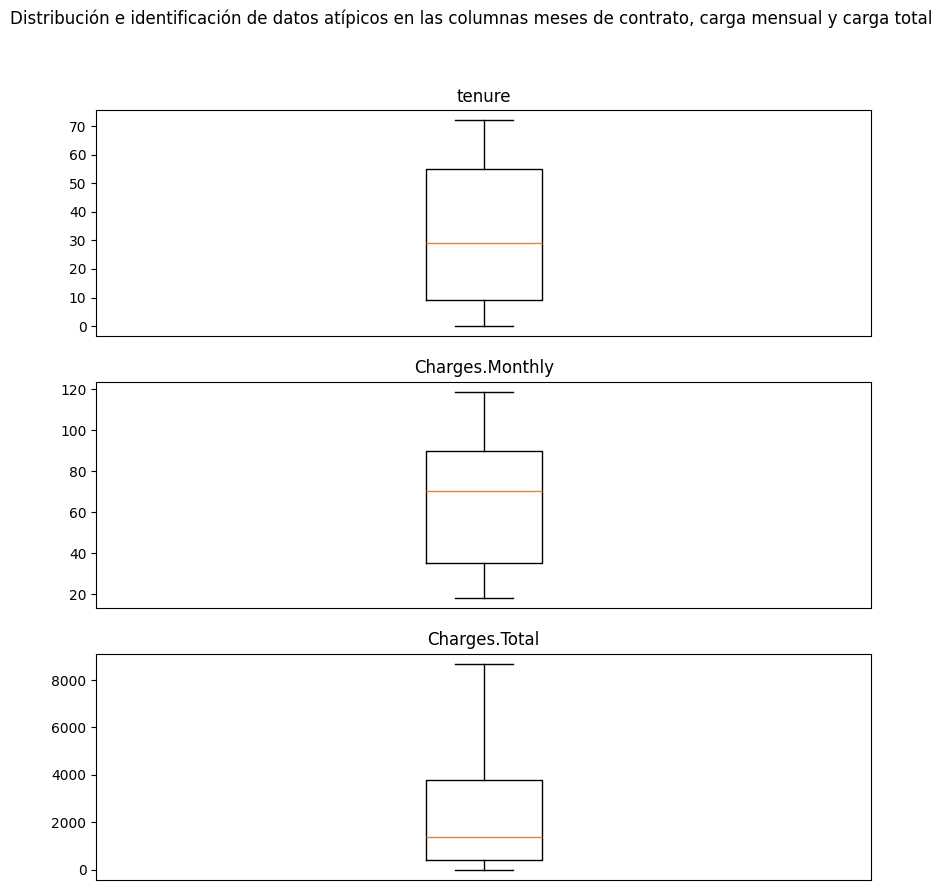

In [302]:
#Gráfica boxplot para la evidenciar la distribución e identificación de datos atípicos
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle("Distribución e identificación de datos atípicos en las columnas meses de contrato, carga mensual y carga total")
for i in range(len(num_col)):
    ax[i].boxplot(df[num_col[i]])
    ax[i].set_title(num_col[i])
    ax[i].xaxis.set_visible(False)

In [303]:
#Columna de cuentas diarías
df["Cuentas_Diarias"] = df["Charges.Monthly"]/30
df["Cuentas_Diarias"].head(5)

,Cuentas_Diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667


### Transformación final de los datos

In [304]:
#Creación de Dataframe con las columnas más importantes
moreImportants = ["customerID", "Churn", "tenure", "PhoneService", "InternetService", "TechSupport", "StreamingTV", "StreamingMovies",
                  "Contract", "Charges.Monthly", "Charges.Total", "Cuentas_Diarias"]
df[moreImportants].head()

,customerID,Churn,tenure,PhoneService,InternetService,TechSupport,StreamingTV,StreamingMovies,Contract,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,9,Yes,DSL,Yes,Yes,No,One year,65.6,593.30,2.186667
1,0003-MKNFE,No,9,Yes,DSL,No,No,Yes,Month-to-month,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,4,Yes,Fiber optic,No,No,No,Month-to-month,73.9,280.85,2.463333
3,0011-IGKFF,Yes,13,Yes,Fiber optic,No,Yes,Yes,Month-to-month,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,3,Yes,Fiber optic,Yes,Yes,No,Month-to-month,83.9,267.40,2.796667


In [305]:
# Convertir las columnas "Churn" y "PhoneService" de valores tipo string ("Yes" / "No") a valores numéricos binarios (1 / 0)
df[["Churn", "PhoneService"]] = df[["Churn", "PhoneService"]].replace({"No": 0, "Yes": 1})

#📊 Carga y análisis

### Análisis de los Datos

In [306]:
#Selección del Dataframe de columnas más importantes de tipo Object
df[moreImportants].describe(include=["O"])

,customerID,InternetService,TechSupport,StreamingTV,StreamingMovies,Contract
count,7267,7267,7267,7267,7267,7267
unique,7267,3,3,3,3,3
top,9995-HOTOH,Fiber optic,No,No,No,Month-to-month
freq,1,3198,3582,2896,2870,4005


In [307]:
df[moreImportants].describe()

,Churn,tenure,PhoneService,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,32.346498,0.902711,64.720098,2277.182035,2.157337
std,0.437115,24.571773,0.296371,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,1.000000,35.425000,396.200000,1.180833
50%,0.000000,29.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,55.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,72.000000,1.000000,118.750000,8684.800000,3.958333


### Distribución de Evasión (Churn)

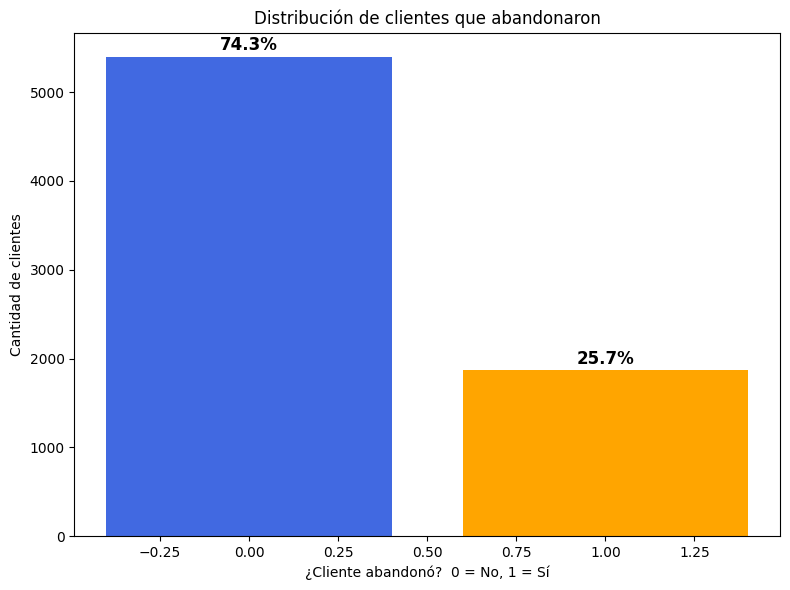

In [308]:
# Preparar los datos
counts = df["Churn"].value_counts()
labels = counts.index
values = counts.values
total = values.sum()

# Definir colores personalizados para cada barra (por ejemplo: azul y naranja)
colores = ["royalblue", "orange"]

# Crear la figura
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colores)
plt.title("Distribución de clientes que abandonaron")
plt.xlabel("¿Cliente abandonó?  0 = No, 1 = Sí")
plt.ylabel("Cantidad de clientes")

# Añadir porcentaje encima de cada barra
for i, v in enumerate(values):
    porcentaje = (v / total) * 100
    plt.text(x=i, y=v + total * 0.01, s=f"{porcentaje:.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [309]:
df["Churn"] = df["Churn"].map({0: "No", 1: "Yes"})

### Recuento de evasión por variables categóricas

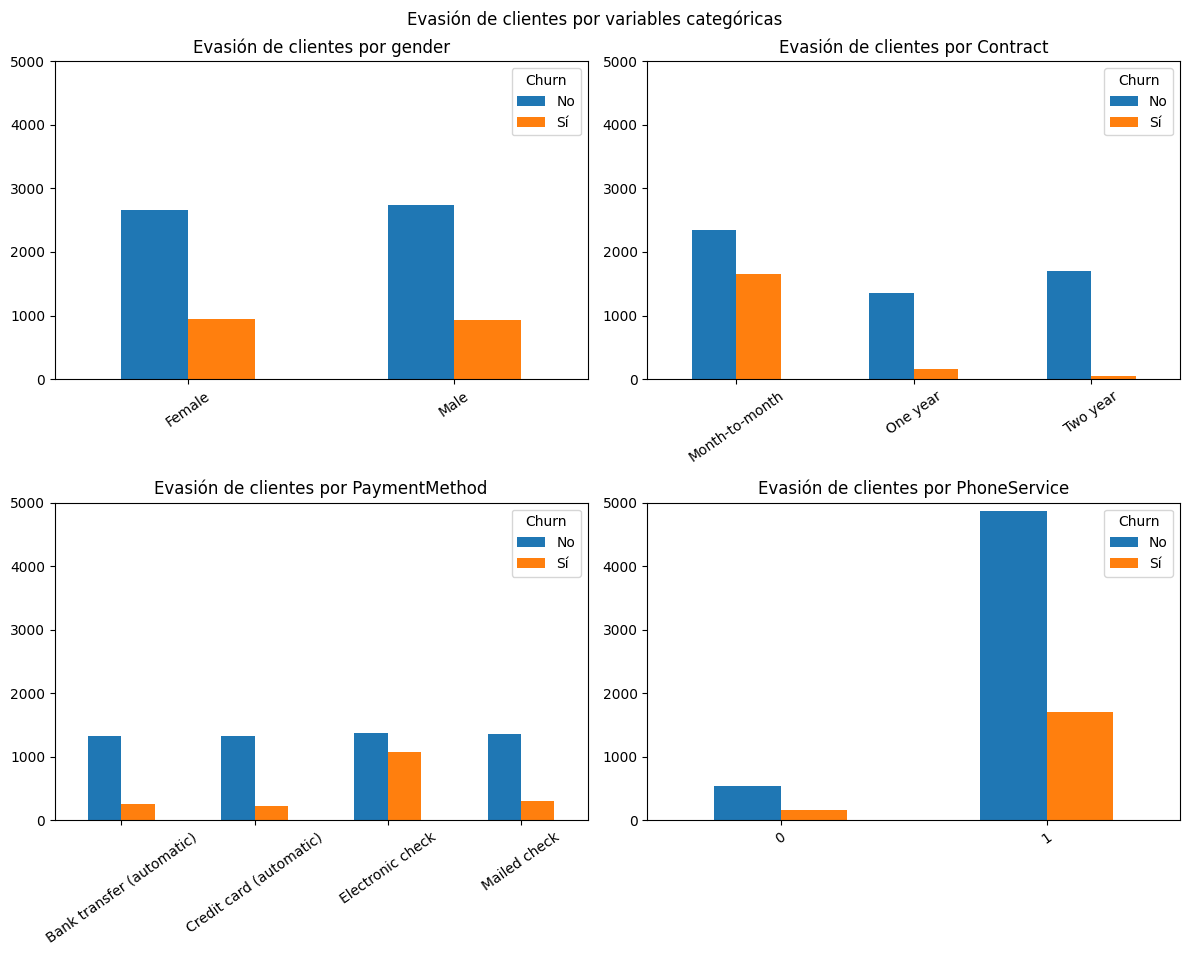

In [310]:
bar_cols = ["gender", "Contract", "PaymentMethod", "PhoneService"]

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Evasión de clientes por variables categóricas")
axes = ax.flatten()

for i, col in enumerate(bar_cols):
    cross = pd.crosstab(df[col], df["Churn"])
    cross.plot(kind="bar", ax=axes[i], rot=35)
    axes[i].set_title(f"Evasión de clientes por {bar_cols[i]}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_ylim(0, 5000)
    axes[i].legend(title="Churn", labels=["No", "Sí"])

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

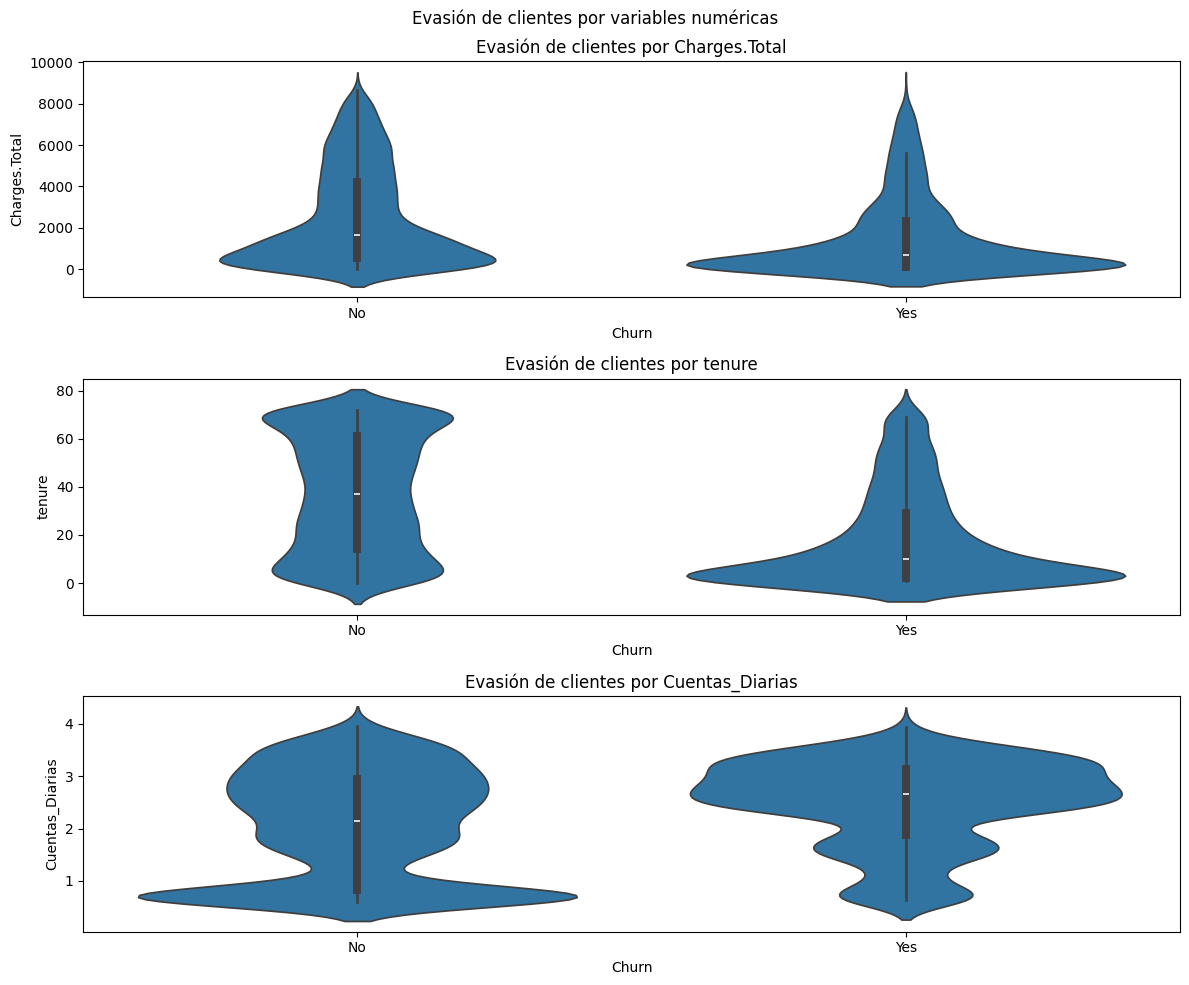

In [311]:
# El gráfico de violín refleja distribución de datos de las columnas Charges.Total,Tenure y Cuentas_Diarias, respecto a Churn, Si presenta o No evasión.
vio_cols = ["Charges.Total", "tenure", "Cuentas_Diarias"]

fig, ax = plt.subplots(3, 1, figsize=(12, 10))
fig.suptitle("Evasión de clientes por variables numéricas")
axes = ax.flatten()

for i in range(len(vio_cols)):
    sns.violinplot(data=df, x="Churn", y=vio_cols[i], ax=axes[i])
    axes[i].set_title(f"Evasión de clientes por {vio_cols[i]}")

plt.tight_layout()
plt.show()

In [312]:
df["Churn_Num"] = df["Churn"].replace({"No": 0, "Yes": 1})

In [313]:
df[["Churn_Num", "Cuentas_Diarias"]].corr()

,Churn_Num,Cuentas_Diarias
Churn_Num,1.000000,0.189866
Cuentas_Diarias,0.189866,1.000000


In [314]:
df[["Churn_Num", "PhoneService"]].corr()

,Churn_Num,PhoneService
Churn_Num,1.000000,0.012571
PhoneService,0.012571,1.000000


In [315]:
df[["Churn_Num", "tenure"]].corr()

,Churn_Num,tenure
Churn_Num,1.000000,-0.344079
tenure,-0.344079,1.000000


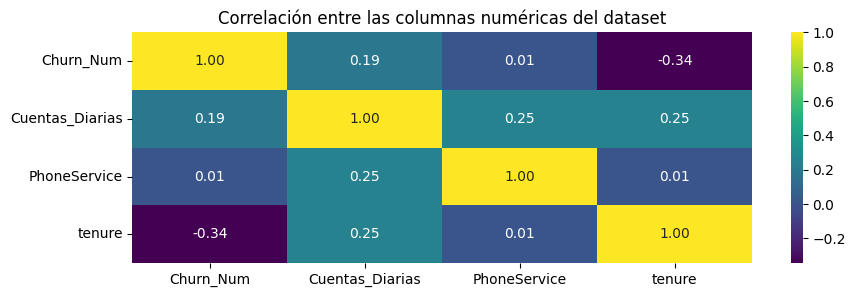

In [316]:
plt.figure(figsize=(10, 3))
sns.heatmap(df[["Churn_Num", "Cuentas_Diarias", "PhoneService", "tenure"]].corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlación entre las columnas numéricas del dataset")
plt.show()

#📄Informe final

### Introducción

**Objetivo del análisis:** Realizar la exploración de los datos de la empresa Telecom X, para intentar explicar un problema de evasión de clientes en la misma. El proposito principal es brindar un dar una respuesta argumenrada en el análisis de los datos y sus resultados.

**Problema:** La alta deserción de los clientes esta afectando la empresa Telecom X. El número de retención es apenas inferior al 30% por lo cual son cifras preocupantes.

### Limpieza y tratamiento de datos

*  **Importación:** Los datos se extrajeron de Github y se importaron como un DataFrame de la libreria pandas en python.

*  **Limpieza:** Los datos no se podian leer de forma sencilla, por lo que se realizo un proceso de normalización el cual lo extiende para sea más legible.

*  Procesamiento: Se realizo la limpieza de los datos, se revisaron las columnas más relevantes y solo se proceso la **columna Churn** (la cuál tenia registros vacios que se reemplazarón con "No" al ser la moda de la variable) y Charges.Total (la cual tenia registros vacios y se hizo algo parecido). Las demás columnas categóricas no presentaron problemas y las numéricas no presentaron datos atípicos con diferentes técnicas para identificarlos.

### Análisis Exploratorio de datos

Como se evidencio en el resultado de los datos y posteriormente se visualizo de forma más precisa, un estimado del 74% de los clientes abandona la compañía. Se pueden encontar diversas razones que esten generando estos incovenientes, pero aqui estan las tres más relevantes:


*   **La cancelación de los contratos de manera recurrente:** Se evidencia que los clientes por lo general cancelan sus contratos dentro de los primeros dos años. Por lo cual este tipo de contrato anual es el que más presenta cancelaciones.

*   **Cancelación por el método de pago:** Los resultados arrojaron que dependiendo del tipo de método de pago se ve reflejada en cierta parte la cancelación de los contratos. En este caso se pudo determinar que los pagos automáticos suelen ser los mejores para los clientes, ya que es más sencillo para ellos realizar los pagos. Mientras que con las facturas por correo, se evidencio mayor evasión a realizar los pagos.


* **Servicios adicionales:** Los clientes que abandonan no aprovechan del todo los servicios ofrecidos a parte del telefónico. Hay muchos beneficios que la mayoría de clientes que abandonan no adquieren a diferencia de los que permanecen, donde sus cuentas diarias tienen gastos mayores.



### 📊Gráficos de apoyo

La gráfica de número de clientes que abandonaron. Es un indicador de la complicada situación de deserción que se esta presentando en TelecomX. Un 74% de abandono frente a un 26% de clientes que permanecen con los servicios que ofrece la empresa.

![texto del vínculo](https://drive.google.com/uc?id=1qGISbRBJCHLNHrpOUIr0uKCiSIcmCmDG)

El conjunto de gráficas evasión de clientes por variables categorícas. Refleja la relación entre la evasión de clientes (Churn) y otras variables como género, tipo de contrato, metodo de pago y servicio telefoníco.

![texto del vínculo](https://drive.google.com/uc?id=1bYTt1nuku16g67rGV8Ussls_8ERQ7qYR)

La gráfica de violin refleja la distribución de la evasión de clientes (Churn) si/no, respecto a otras variables importantes como Charges.total, tenure, cuentas_diarias. Se puede evidenciar que en las diferentes comparaciones que el Si, prevalece sobre el, No.

![texto del vínculo](https://drive.google.com/uc?id=1fycmvTKXUDJdoxMWbN28K6pls4P1Q25g)

### Conclusiones e Insights

A continuación expondre los factores que considero han influido en la cancelación generalizada de los contratos y por ende la alta perdida de clientes.

1. **Contratos como Factor Clave**: Los usuarios con contratos mensuales tienen una probabilidad mucho mayor de abandonar el servicio en comparación con quienes poseen contratos a uno o dos años.


2. **Formas de Pago y su Relación con la Cancelación**: Se observa que quienes pagan mediante tarjetas electrónicas o sistemas automáticos tienden a cancelar con más frecuencia. Esto podría indicar que estos clientes tienen menor sensación de control o compromiso con el servicio.
Costos Mensuales y Cancelación


3. **Los clientes cuyo pago mensual excede el valor de $90**: Estos clientes presentan una mayor inclinación a terminar su contrato, lo que podría reflejar una percepción negativa respecto al costo frente a los beneficios.


4. **Uso de Facturación Electrónica:** Hay un leve incremento en la tasa de cancelación entre usuarios que optan por la facturación electrónica, probablemente vinculado a problemas de usabilidad o confusión con los cargos.

5. **Influencia de Factores Personales:** Este último factor tambien debe ser tenido en cuenta, el estado civil y la existencia de dependientes parecen tener un efecto pequeño, señalando que los clientes con lazos familiares tienden a mantener el servicio por más tiempo.

### Recomendaciones

Se sugieren tres aspectecos a mejorar para que TelecomX pueda revertir la situación actual y de cara al futuro disminuya la perdida de clientes.



1.   **Mejorar los tipos de contrato** Presentar a los clientes beneficios por los tipos de contratos más estables y de mayor plazo, con el objetivo de fidelizar a los clientes a tráves de beneficios que hagan más atractivo este tipo de contrato.
2.   **Especial atención a los métodos de pago**: Hacer enfasís en que métodos de pago son mejores para los clientes, cuales les brindan más facilidades e intentar evitar ofrecer los métodos de pago que generan mayor inconvenientes a la hora de pagar y por ende mayor deserción de clientes.
3. **Precios más accecibles:** Presentar a los clientes, precios de los servicos más reducidos para asi generar mayor alcance y lograr incrementar la contratación de los servicios. Adicionalmente, los clientes se fidelizarán más porque un buen servicio de la mano con precios cómodos. Son claves para incrementar la retención de los clientes.

